In [ ]:
# 생성 해야할 파일 리스트

* WORDMAP_coco_5_cap_per_img_5_min_word_freq.json

TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json

VAL_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json

TEST_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TEST_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TEST_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json

train36.hdf5
val36.hdf5

In [136]:
with open("./final_dataset/TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json", 'r') as f:
    TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq=json.load(f)

In [138]:
with open("./final_dataset/VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json", 'r') as f:
    VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq=json.load(f)

In [140]:
with open("./final_dataset/VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json", 'r') as f:
    VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq=json.load(f)

In [141]:
VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq

[['v', 35372],
 ['v', 32358],
 ['v', 33057],
 ['v', 31720],
 ['v', 35023],
 ['v', 35427],
 ['v', 33624],
 ['v', 31711],
 ['v', 34539],
 ['v', 33778],
 ['v', 32028],
 ['v', 33605],
 ['v', 32567],
 ['v', 30715],
 ['v', 33797],
 ['v', 30952],
 ['v', 34422],
 ['v', 33733],
 ['v', 33438],
 ['v', 33950],
 ['v', 31458],
 ['v', 35228],
 ['v', 32597],
 ['v', 31828],
 ['v', 33368],
 ['v', 31759],
 ['v', 31710],
 ['v', 32085],
 ['v', 31614],
 ['v', 34281],
 ['v', 33439],
 ['v', 34952],
 ['v', 33526],
 ['v', 33335],
 ['v', 31299],
 ['v', 33157],
 ['v', 33519],
 ['v', 30820],
 ['v', 31049],
 ['v', 33361],
 ['v', 32900],
 ['v', 31905],
 ['v', 32415],
 ['v', 32553],
 ['v', 32676],
 ['v', 34727],
 ['v', 35001],
 ['v', 34275],
 ['v', 32356],
 ['v', 32909],
 ['v', 32931],
 ['v', 33158],
 ['v', 32963],
 ['v', 32895],
 ['v', 35212],
 ['v', 32099],
 ['v', 34065],
 ['v', 32062],
 ['v', 30771],
 ['v', 34234],
 ['v', 33067],
 ['v', 33648],
 ['v', 31028],
 ['v', 31685],
 ['v', 33672],
 ['v', 35166],
 ['v', 314

In [2]:
from glob import glob
import json
import h5py
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '4'

In [3]:
import sys
sys.path.append(os.path.join(os.getcwd(), "vizwiz-caption"))

In [4]:
split = 'TRAIN'
data_folder = 'final_dataset'
data_name = 'coco_5_cap_per_img_5_min_word_freq'

# tokenizer 준비
* https://github.com/HwangJohn/vizwiz-caption


In [5]:
%matplotlib inline
from vizwiz_api.vizwiz import VizWiz
from vizwiz_eval_cap.eval import VizWizEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import pylab
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [146]:
!chmod 755 vizwiz-captions/get_stanford_models.sh

chmod: cannot access 'vizwiz-captions/get_stanford_models.sh': No such file or directory


In [147]:
!vizwiz-caption/get_stanford_models.sh

Found Stanford CoreNLP.


In [148]:
annTrainFile = '../mypythia/data/vizwiz/annotations/train.json'
annValFile    = '../mypythia/data/vizwiz/annotations/val.json'

In [149]:
vizwizTrain = VizWiz(annTrainFile, ignore_rejected=True, ignore_precanned=True)

loading annotations into memory...
Done (t=0.54s)
creating index...
index created! imgs = 23431, anns = 100575


In [150]:
vizwizVal = VizWiz(annValFile, ignore_rejected=True, ignore_precanned=True)

loading annotations into memory...
Done (t=0.16s)
creating index...
index created! imgs = 7750, anns = 33145


A control panel for a treadmill exercise machine.
A black workout machine with a grey interface and grey buttons
-This is the screen of a piece of exercise equipment
-The number on the screen says 4,19
-There are gray buttons to change the incline, speed and to start and stop the machine
A medical device of sorts with digital displays is sitting here.
A metal bar with a silver control panel with a timer


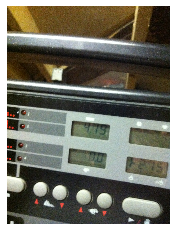

In [166]:
# fig = plt.figure(figsize=(20,20))
# get all images, select one at random
imgIds = vizwizTrain.getImgIds()
img = vizwizTrain.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

# load and display caption annotations
annIds = vizwizTrain.getAnnIds(imgIds=img['id']);
anns = vizwizTrain.loadAnns(annIds)
vizwizTrain.showAnns(anns)

# load and display image
I = io.imread(img['vizwiz_url'])
plt.axis('off'); plt.imshow(I); plt.show()

In [152]:
from vizwiz_eval_cap.tokenizer.ptbtokenizer import PTBTokenizer
tokenizer = PTBTokenizer()

gts = {}
for imgId in imgIds:
    if vizwizTrain.imgToAnns[imgId]:
        gts[imgId] = vizwizTrain.imgToAnns[imgId]

tokenized_train = tokenizer.tokenize(gts)

# for imgId in imgIds:
#     if vizwizVal.imgToAnns[imgId]:

In [50]:
tokenized_train

{0: ['its is a basil leaves container its contains the net weight too',
  'a green and white plastic condiment bottle containing basil leaves',
  'a bottle of spices in a plastic container laying on a surface',
  'some basil leaves in a container on a counter'],
 1: ['a can of coca cola on a counter is shown for when one can use a nice cold drink',
  'a black can of coca cola zero calorie soda is on the counter near the coffee maker',
  'a kitchen counter the various items on top including a can of coca-cola metal containers and a teapot',
  'a black tin of coca cola placed on a black surface',
  'black counter with canisters kettle and can of soda'],
 2: ['a can of crushed tomatoes are on a brown surface the tomatoes read crushed tomatoes on the brand',
  'a can of crushed tomatoes sitting on a beige colored counter',
  'a can of crushed tomatoes in puree from price chopper',
  'a price chopper branded can of crushed tomatoes',
  'image is a can of crushed tomatoes in view'],
 3: ['a 

In [52]:
train_words_list = []
for k, v in tokenized_train.items():
    for s in v:
        train_words_list.extend(s.split(' '))    

In [ ]:
val_words_list = []
for k, v in tok

In [ ]:
# # 테스트 후에도 성능이 안올라갈 시 추후에 정밀한 전처리 시도
# https://github.com/ratsgo/embedding/blob/master/preprocess/dump.py

# WIKI_REMOVE_CHARS = re.compile("'+|(=+.{2,30}=+)|__TOC__|(ファイル:).+|:(en|de|it|fr|es|kr|zh|no|fi):|\n", re.UNICODE)
# WIKI_SPACE_CHARS = re.compile("(\\s|゙|゚|　)+", re.UNICODE)
# EMAIL_PATTERN = re.compile("(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", re.UNICODE)
# URL_PATTERN = re.compile("(ftp|http|https)?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", re.UNICODE)
# WIKI_REMOVE_TOKEN_CHARS = re.compile("(\\*$|:$|^파일:.+|^;)", re.UNICODE)
# MULTIPLE_SPACES = re.compile(' +', re.UNICODE)

# content = re.sub(EMAIL_PATTERN, ' ', content)  # remove email pattern
# content = re.sub(URL_PATTERN, ' ', content) # remove url pattern
# content = re.sub(WIKI_REMOVE_CHARS, ' ', content)  # remove unnecessary chars
# content = re.sub(WIKI_SPACE_CHARS, ' ', content)
# content = re.sub(MULTIPLE_SPACES, ' ', content)
# tokens = content.replace(", )", "").split(" ")

In [57]:
# 전처리 하기 전
tmp_words_list = []
for a in vizwiz_train_anno['annotations']:
    tmp_words_list.extend(a['caption'].split(" "))

In [65]:
tmp_words_list = np.unique(np.array(tmp_words_list))

In [67]:
list(tmp_words_list)

['',
 '\r\n',
 '\r\n\r\ncover',
 "\r\n'20",
 '\r\nAT',
 '\r\nArabic',
 "\r\nWho's",
 '"',
 '"\r\n-"It',
 '"\r\n-"The/This',
 '"\r\n-"This',
 '"\r\n-"this',
 '"\r\n-It',
 '"1,039/Smoothed',
 '"100',
 '"100%',
 '"101',
 '"103"',
 '"106.8"',
 '"115',
 '"14',
 '"140"',
 '"2',
 '"2008',
 '"20x',
 '"216',
 '"235',
 '"24"',
 '"25c"',
 '"27550"',
 '"2:03"',
 '"3',
 '"3:45".',
 '"3MCY8JL5"',
 '"4',
 '"4/2013',
 '"4xe55g",',
 '"51"',
 '"5229"',
 '"53716"',
 '"60',
 '"65"',
 '"682"',
 '"69"',
 '"800",',
 '"9',
 '"A',
 '"A"',
 '"A/C',
 '"AIN\'T',
 '"AM',
 '"AM.EAGLE',
 '"AMAHA"',
 '"AN"',
 '"ANIMAL',
 '"ASC"',
 '"AUTO"',
 '"AXE"',
 '"Acquiring',
 '"Activia"',
 '"Ahmed"',
 '"Air',
 '"Alaska"',
 '"Alfani',
 '"All',
 '"Amazing',
 '"America\'s',
 '"Amigos"',
 '"An',
 '"And',
 '"Annals',
 '"Anne',
 '"Anne",',
 '"Annie\'s',
 '"Another',
 '"Any',
 '"Apple',
 '"Apricot',
 '"Are',
 '"Armand',
 '"Army',
 '"Articles',
 '"Asher\'s"',
 '"Asia',
 '"Assessment',
 '"AttlyOC',
 '"Aunt',
 '"Australia',
 '"Avery"',


In [62]:
# 전처리 후
uniq_train_words = np.unique(np.array(train_words_list))

In [68]:
list(train_words_list)

['its',
 'is',
 'a',
 'basil',
 'leaves',
 'container',
 'its',
 'contains',
 'the',
 'net',
 'weight',
 'too',
 'a',
 'green',
 'and',
 'white',
 'plastic',
 'condiment',
 'bottle',
 'containing',
 'basil',
 'leaves',
 'a',
 'bottle',
 'of',
 'spices',
 'in',
 'a',
 'plastic',
 'container',
 'laying',
 'on',
 'a',
 'surface',
 'some',
 'basil',
 'leaves',
 'in',
 'a',
 'container',
 'on',
 'a',
 'counter',
 'a',
 'can',
 'of',
 'coca',
 'cola',
 'on',
 'a',
 'counter',
 'is',
 'shown',
 'for',
 'when',
 'one',
 'can',
 'use',
 'a',
 'nice',
 'cold',
 'drink',
 'a',
 'black',
 'can',
 'of',
 'coca',
 'cola',
 'zero',
 'calorie',
 'soda',
 'is',
 'on',
 'the',
 'counter',
 'near',
 'the',
 'coffee',
 'maker',
 'a',
 'kitchen',
 'counter',
 'the',
 'various',
 'items',
 'on',
 'top',
 'including',
 'a',
 'can',
 'of',
 'coca-cola',
 'metal',
 'containers',
 'and',
 'a',
 'teapot',
 'a',
 'black',
 'tin',
 'of',
 'coca',
 'cola',
 'placed',
 'on',
 'a',
 'black',
 'surface',
 'black',
 'c

## 1. caption word freq file 만들기

### coco 데이터 : WORDMAP_coco_5_cap_per_img_5_min_word_freq.json

In [3]:
glob("./final_dataset/*") # 'coco_5_cap_per_img_5_min_word_freq'

['./final_dataset/train36.hdf5',
 './final_dataset/val36.hdf5',
 './final_dataset/train36_imgid2idx.pkl',
 './final_dataset/train_ids.pkl',
 './final_dataset/val36_imgid2idx.pkl',
 './final_dataset/val_ids.pkl',
 './final_dataset/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TRAIN_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/VAL_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TEST_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TEST_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TRAIN_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json',
 './final_dataset/TEST_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json']

In [5]:
with open('final_dataset/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json', 'r') as f:
    WORDMAP_coco_5_cap_per_img_5_min_word_freq = json.load(f)

In [52]:
WORDMAP_coco_5_cap_per_img_5_min_word_freq

{'raining': 4707,
 'writings': 2285,
 'both': 8006,
 'yellow': 2286,
 'four': 4709,
 'prices': 1562,
 'woods': 1,
 'hanging': 2,
 'woody': 3,
 'comically': 4,
 'marching': 2288,
 'canes': 5,
 'advantage': 6781,
 'electricity': 2289,
 'sunlit': 2290,
 'deckered': 4710,
 'shaving': 7032,
 'sinking': 4711,
 'shielding': 2291,
 'peanuts': 7967,
 'deli': 2292,
 'oceans': 4713,
 'dell': 2293,
 'figs': 2294,
 'fur': 3969,
 'stabbed': 4715,
 'bringing': 6,
 'wooded': 7,
 'prize': 2295,
 'wooden': 8,
 'satchel': 2296,
 'frizbee': 4716,
 'crotch': 9,
 'fritter': 2297,
 'ornamental': 4717,
 'charter': 2298,
 'glassy': 2299,
 'daybed': 2300,
 'eagle': 1899,
 'miller': 2301,
 'snuggles': 10,
 'ornate': 2287,
 'sailer': 4720,
 'scraper': 11,
 'tires': 7035,
 'bannister': 12,
 'rusty': 4756,
 'tether': 2302,
 'sterile': 2303,
 'snuggled': 13,
 'blouse': 7038,
 'admire': 416,
 'dangled': 2304,
 'cooking': 14,
 'fingers': 7040,
 'numeral': 15,
 'crouch': 16,
 'reporter': 7042,
 'herb': 7043,
 'here': 7

### vizwiz 데이터: WORDMAP_vizwiz_5_cap_per_img_5_min_word_freq.json

In [70]:
%matplotlib inline
from vizwiz_api.vizwiz import VizWiz
from vizwiz_eval_cap.eval import VizWizEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import pylab
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [51]:
glob("../mypythia/data/vizwiz/annotations/*")

['../mypythia/data/vizwiz/annotations/test.json',
 '../mypythia/data/vizwiz/annotations/val.json',
 '../mypythia/data/vizwiz/annotations/train.json']

In [72]:
train_anno_path = '../mypythia/data/vizwiz/annotations/train.json'
# with open( train_anno_path,  'r') as f:
#     vizwiz_train_anno = json.load(f)
    
val_anno_path = '../mypythia/data/vizwiz/annotations/val.json'
# with open(val_anno_path, 'r') as f:
#     vizwiz_val_anno = json.load(f)

In [42]:
# vizwiz_train_anno.keys(), vizwiz_val_anno.keys()

(dict_keys(['info', 'images', 'annotations']),
 dict_keys(['info', 'images', 'annotations']))

In [73]:
from vizwiz_eval_cap.tokenizer.ptbtokenizer import PTBTokenizer

vizwizTrain = VizWiz(train_anno_path, ignore_rejected=True, ignore_precanned=True)

tokenizer = PTBTokenizer()

gts = {}
for imgId in imgIds:
    if vizwizTrain.imgToAnns[imgId]:
        gts[imgId] = vizwizTrain.imgToAnns[imgId]

tokenized_train = tokenizer.tokenize(gts)

loading annotations into memory...
Done (t=0.39s)
creating index...
index created! imgs = 23431, anns = 100575


In [75]:
train_words_list = []
for k, v in tokenized_train.items():
    for s in v:
        train_words_list.extend(s.split(' '))

In [77]:
WORDMAP = dict()
def update_wordmap(w):
    if w in WORDMAP:
        WORDMAP[w] = WORDMAP[w] + 1
    else: 
        WORDMAP[w] = 1

[update_wordmap(w) for w in train_words_list]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [78]:
WORDMAP

{'its': 1037,
 'is': 23180,
 'a': 152246,
 'basil': 55,
 'leaves': 323,
 'container': 3555,
 'contains': 645,
 'the': 36375,
 'net': 41,
 'weight': 112,
 'too': 274,
 'green': 5454,
 'and': 30822,
 'white': 16936,
 'plastic': 3735,
 'condiment': 42,
 'bottle': 9941,
 'containing': 1169,
 'of': 68719,
 'spices': 181,
 'in': 18177,
 'laying': 2711,
 'on': 45437,
 'surface': 4028,
 'some': 5271,
 'counter': 4199,
 'can': 8402,
 'coca': 239,
 'cola': 295,
 'shown': 1608,
 'for': 4632,
 'when': 43,
 'one': 1439,
 'use': 281,
 'nice': 102,
 'cold': 107,
 'drink': 624,
 'black': 10605,
 'zero': 120,
 'calorie': 36,
 'soda': 828,
 'near': 938,
 'coffee': 2244,
 'maker': 130,
 'kitchen': 1543,
 'various': 624,
 'items': 790,
 'top': 8312,
 'including': 207,
 'coca-cola': 106,
 'metal': 874,
 'containers': 160,
 'teapot': 5,
 'tin': 672,
 'placed': 1296,
 'with': 35677,
 'canisters': 13,
 'kettle': 36,
 'crushed': 39,
 'tomatoes': 291,
 'are': 2618,
 'brown': 3576,
 'read': 196,
 'brand': 2358,


In [79]:
len(WORDMAP)

19023

In [89]:
# 결과 저장
with open('final_dataset/WORDMAP_vizwiz_5_cap_per_img_5_min_word_freq.json', 'w') as f:
    json.dump(WORDMAP, f)

In [41]:
import torch
from torch.utils.data import Dataset
import h5py
import json
import os

class CaptionDataset(Dataset):
    def __init__(self, data_folder, data_name, split, transform=None):
        self.split = split
        assert self.split in {'TRAIN', 'VAL','TEST'}

        self.train_hf = h5py.File(data_folder + '/train36.hdf5', 'r')
        self.train_features = self.train_hf['image_features']
        self.val_hf = h5py.File(data_folder + '/val36.hdf5', 'r')
        self.val_features = self.val_hf['image_features']
        self.cpi = 5
        
        # Load encoded captions 
        with open(os.path.join(data_folder, self.split + '_CAPTIONS_' + data_name + '.json'), 'r') as j:
            self.captions = json.load(j)
        # Load caption lengths 
        with open(os.path.join(data_folder, self.split + '_CAPLENS_' + data_name + '.json'), 'r') as j:
            self.caplens = json.load(j)
        # Load bottom up image features distribution
        with open(os.path.join(data_folder, self.split + '_GENOME_DETS_' + data_name + '.json'), 'r') as j:
            self.objdet = json.load(j)

        # PyTorch transformation pipeline for the image (normalizing, etc.)
        self.transform = transform
        # Total number of datapoints
        self.dataset_size = len(self.captions)
        
    def __getitem__(self, i):
        
        # The Nth caption corresponds to the (N // captions_per_image)th image
        objdet = self.objdet[i // self.cpi]
        # Load bottom up image features
        if objdet[0] == "v":
            img = torch.FloatTensor(self.val_features[objdet[1]])
        else:
            img = torch.FloatTensor(self.train_features[objdet[1]])

        caption = torch.LongTensor(self.captions[i])
        caplen = torch.LongTensor([self.caplens[i]])
        
        if self.split is 'TRAIN':
            return img, caption, caplen
        else:
            # For validation of testing, also return all 'captions_per_image' captions to find BLEU-4 score
            all_captions = torch.LongTensor(
                self.captions[((i // self.cpi) * self.cpi):(((i // self.cpi) * self.cpi) + self.cpi)])
            return img, caption, caplen,all_captions

    def __len__(self):
        return self.dataset_size

In [ ]:
TEST_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TEST_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TEST_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
VAL_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
WORDMAP_coco_5_cap_per_img_5_min_word_freq.json
WORDMAP_vizwiz_5_cap_per_img_5_min_word_freq.json
train36.hdf5
train36_imgid2idx.pkl
train_ids.pkl
val36.hdf5
val36_imgid2idx.pkl
val_ids.pkl

In [42]:
cd = CaptionDataset(data_folder='final_dataset', data_name='coco_5_cap_per_img_5_min_word_freq', split='TRAIN')

In [45]:
cd.train_hf.keys(), cd.val_hf.keys()

(<KeysViewHDF5 ['image_bb', 'image_features', 'spatial_features']>,
 <KeysViewHDF5 ['image_bb', 'image_features', 'spatial_features']>)

In [ ]:
# 으아... 다 모르겠고....

In [ ]:
# README 따라가자...

Data preparation

Create a folder called 'data'

Create a folder called 'final_dataset'

Download the MSCOCO Training (13GB) and Validation (6GB) images.

Also download Andrej Karpathy's training, validation, and test splits. This zip file contains the captions.

Unzip all files and place the folders in 'data' folder.

In [102]:
!ls -alh data/

total 19G
drwxr-xr-x  5 1005 1000  269 Apr 22 13:33 .
drwxr-xr-x 12 1005 1000 4.0K Apr 30 09:56 ..
drwxr-xr-x  2 1005 1000   39 Apr 22 13:33 caption_datasets
-rw-r--r--  1 1005 1000  36M Apr 15  2015 caption_datasets.zip
-rw-rw-r--  1 1005 1000  37M Nov 25  2014 dataset_flickr30k.json
-rw-rw-r--  1 1005 1000 8.7M Nov 24  2014 dataset_flickr8k.json
-rwxr-xr-x  1 1005 1000  294 Apr 22 11:27 download.sh
-rw-------  1 1005 1000  133 Apr 22 11:28 nohup.out
drwxrwxr-x  2 1005 1000 3.9M Aug 16  2014 train2014
-rw-r--r--  1 1005 1000  13G Jul 11  2018 train2014.zip
drwxrwxr-x  2 1005 1000 1.9M Aug 16  2014 val2014
-rw-r--r--  1 1005 1000 6.2G Jul 11  2018 val2014.zip


In [ ]:
# 여기 있는 파일들에 맞춰 만들어주기...

In [98]:
!ls data/train2014 | head -n 10

COCO_train2014_000000000009.jpg
COCO_train2014_000000000025.jpg
COCO_train2014_000000000030.jpg
COCO_train2014_000000000034.jpg
COCO_train2014_000000000036.jpg
COCO_train2014_000000000049.jpg
COCO_train2014_000000000061.jpg
COCO_train2014_000000000064.jpg
COCO_train2014_000000000071.jpg
COCO_train2014_000000000072.jpg
ls: write error: Broken pipe


In [100]:
!ls ../mypythia/data/vizwiz/train/ | head -n 10

VizWiz_train_00000000.jpg
VizWiz_train_00000001.jpg
VizWiz_train_00000002.jpg
VizWiz_train_00000003.jpg
VizWiz_train_00000004.jpg
VizWiz_train_00000005.jpg
VizWiz_train_00000006.jpg
VizWiz_train_00000007.jpg
VizWiz_train_00000008.jpg
VizWiz_train_00000009.jpg
ls: write error: Broken pipe


In [ ]:
# train2014, val2014 은 경로만 맞춰주면 될듯?!

In [115]:
import pickle
with open("final_dataset/train_ids.pkl", "rb") as p:
    train_ids = pickle.load(p)

In [118]:
len(train_ids)

82783

In [135]:
!ls -alh ./trainval_36/trainval_resnet101_faster_rcnn_genome_36.tsv

-rw------- 1 1005 1000 46G Aug 14  2017 ./trainval_36/trainval_resnet101_faster_rcnn_genome_36.tsv


In [134]:
import csv
import tqdm
FIELDNAMES = ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features']
with open('./trainval_36/trainval_resnet101_faster_rcnn_genome_36.tsv', 'r+b') as tsv_in_file:
    reader = csv.DictReader(tsv_in_file, delimiter='\t', fieldnames=FIELDNAMES)
    for item in tqdm(reader):
        print(item)
        break

TypeError: 'module' object is not callable

In [174]:
!ls final_dataset/

TEST_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TEST_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TEST_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
TRAIN_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
VAL_CAPLENS_coco_5_cap_per_img_5_min_word_freq.json
VAL_CAPTIONS_coco_5_cap_per_img_5_min_word_freq.json
VAL_GENOME_DETS_coco_5_cap_per_img_5_min_word_freq.json
WORDMAP_coco_5_cap_per_img_5_min_word_freq.json
WORDMAP_vizwiz_5_cap_per_img_5_min_word_freq.json
train36.hdf5
train36_imgid2idx.pkl
train_ids.pkl
val36.hdf5
val36_imgid2idx.pkl
val_ids.pkl


In [131]:
# 결국 tsv파일 만들어줘야함...

0

In [ ]:
# pythia pretraining model 가져와서 100을 그대로 사용해보기
# 1. pythia pretraing model loading
# 2. ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features'] 만들어서 tsv형식으로 저장
# 파일명: trainval_36/trainval_resnet101_faster_rcnn_genome_36_vizwiz.tsv

In [128]:
# npy image feature 가져오기
import os
os.environ['CUDA_VISIBLE_DEVICES']='4'
from tqdm import tqdm
import yaml
import cv2
import torch
import requests
import numpy as np
import gc
import torch.nn.functional as F
import pandas as pd
import csv
import base64

from glob import glob
import torchvision.models as models
import torchvision.transforms as transforms

from PIL import Image
from IPython.display import display, HTML, clear_output
from ipywidgets import widgets, Layout
from io import BytesIO

from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.layers import nms
from maskrcnn_benchmark.modeling.detector import build_detection_model
from maskrcnn_benchmark.structures.image_list import to_image_list
from maskrcnn_benchmark.utils.model_serialization import load_state_dict

train_paths = glob("../mypythia/data/vizwiz/train/*")
train_paths = sorted(train_paths, key=lambda x: int(os.path.split(x)[-1].split("_")[-1].split(".")[0]))
os.environ['CUDA_VISIBLE_DEVICES'] = '4'
tsv_info_list = []
BASE_PATH = '../mypythia'

def _image_transform(image_path):

    img = Image.open(image_path)
    im = np.array(img).astype(np.float32)
    im = im[:, :, ::-1]
    im -= np.array([102.9801, 115.9465, 122.7717])
    im_shape = im.shape
    im_size_min = np.min(im_shape[0:2])
    im_size_max = np.max(im_shape[0:2])
    im_scale = float(800) / float(im_size_min)
    # Prevent the biggest axis from being more than max_size
    if np.round(im_scale * im_size_max) > 1333:
       im_scale = float(1333) / float(im_size_max)
    im = cv2.resize(
       im,
       None,
       None,
       fx=im_scale,
       fy=im_scale,
       interpolation=cv2.INTER_LINEAR
    )
    img = torch.from_numpy(im).permute(2, 0, 1)
    return img, im_scale

def _build_detection_model():
    
    cfg.merge_from_file(os.path.join(BASE_PATH,'content/model_data/detectron_model.yaml'))
    cfg.freeze()

    model = build_detection_model(cfg)
    checkpoint = torch.load(os.path.join(BASE_PATH,'content/model_data/detectron_model.pth'), 
                          map_location=torch.device("cpu"))

    load_state_dict(model, checkpoint.pop("model"))

    #     model.to("cuda")
    model.eval()
    return model

# ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features']
def _process_feature_extraction(output,
                             im_scales,
                             feat_name='fc6',
                             conf_thresh=0.2):
    batch_size = len(output[0]["proposals"])
    n_boxes_per_image = [len(_) for _ in output[0]["proposals"]]
    score_list = output[0]["scores"].split(n_boxes_per_image)
    score_list = [torch.nn.functional.softmax(x, -1) for x in score_list]
    feats = output[0][feat_name].split(n_boxes_per_image)
    cur_device = score_list[0].device

    feat_list = []
    keep_boxes_list = []

    for i in range(batch_size):
        dets = output[0]["proposals"][i].bbox / im_scales[i]
        #         print(f"im_scales[i]: {im_scales[i]!r}")
        scores = score_list[i]

        max_conf = torch.zeros((scores.shape[0])).to(cur_device)

        for cls_ind in range(1, scores.shape[1]):
            cls_scores = scores[:, cls_ind]
            keep = nms(dets, cls_scores, 0.5)
            max_conf[keep] = torch.where(cls_scores[keep] > max_conf[keep],
                                       cls_scores[keep],
                                       max_conf[keep])

        keep_boxes = torch.argsort(max_conf, descending=True)[:100]
        feat_list.append(feats[i][keep_boxes])
        
        
    return feat_list, output[0]["proposals"][0].bbox

#batchsize 는 1로 고정
def get_tsv_info(path):
    
    image_id = int(os.path.split(path)[-1].split('_')[-1].split('.')[0])
    
    im, im_scale = _image_transform(train_paths[0])
    img_tensor, im_scales = [im], [im_scale]
    current_img_list = to_image_list(img_tensor, size_divisible=32)
    #     current_img_list = current_img_list.to('cuda')
    output = model(current_img_list)
    
    gc.collect()
    torch.cuda.empty_cache()
    
    feat_list, bbox = _process_feature_extraction(output, im_scales, 'fc6', 0.2)
    
    image_width = output[1][0].size[0]
    image_height= output[1][0].size[1]
    return {'image_id':image_id, 'image_w':image_width, 'image_h':image_height, 'num_boxes':100, 'boxes':base64.encodebytes(np.array(bbox.tolist()).tobytes()), 'features':base64.encodebytes(np.array(feat_list[0].tolist()).tobytes())}    
    #     return {'image_id':image_id, 'image_w':image_width, 'image_h':image_height, 'num_boxes':100, 'boxes':base64.encodebytes(np.array(bbox.tolist()).tobytes()), 'features':base64.encodebytes(np.array(feat_list[0].tolist()).tobytes())}
    #     return [image_id, image_width, image_height, 100, base64.encodestring(np.array(bbox.tolist()).tobytes()), base64.encodestring(np.array(feat_list[0].tolist()).tobytes())]

In [8]:
model = _build_detection_model()

In [129]:
# tsv_info_list = []
outfile = './trainval_36/trainval_resnet101_faster_rcnn_genome_36_vizwiz.tsv'
train_tqdm = tqdm(train_paths[:2])

with open(outfile, "w") as tsv_out_file:
    FIELDNAMES = ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features']
    writer = csv.DictWriter(tsv_out_file, delimiter='\t', fieldnames=FIELDNAMES)
    
    writer.writeheader()
    [writer.writerow(get_tsv_info(x)) for x in train_tqdm]

# ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features']









  0%|          | 0/2 [05:17<?, ?it/s]






 50%|█████     | 1/2 [00:04<00:04,  4.26s/it]





100%|██████████| 2/2 [00:08<00:00,  4.05s/it]


In [130]:
!cat ./trainval_36/trainval_resnet101_faster_rcnn_genome_36_vizwiz.tsv

image_id	image_w	image_h	num_boxes	boxes	features


0	800	1088	100	b'AAAAAEq3QEAAAADAIWR2QAAAACBxqYRAAAAA4KEZi0AAAAAAAAAAAAAAAMBsFnJAAAAAgJezh0AA\nAACgPgqOQAAAAAA0LSRAAAAAAAAAAAAAAAAA3kKFQAAAAOB2MHpAAAAAAAAAAAAAAABAbZWAQAAA\nAEBiyYVAAAAAoN6EkEAAAAAA+YZGQAAAAID9R0BAAAAAABY4hkAAAABAMh2AQAAAAAAAAAAAAAAA\ngASSX0AAAAAARe6EQAAAAAAHR4VAAAAAAFvjSUAAAAAAVhKDQAAAAMDHQ4JAAAAAQN1mkEAAAAAA\nAAAAAAAAAMCRjHZAAAAAQE3/fUAAAADgiQiKQAAAAACFZ0xAAAAAoLlQeEAAAAAAAPiIQAAAAKCz\nhJBAAAAAAAAAAAAAAACgPfCFQAAAAMBiXoRAAAAAAAD8kEAAAAAAAAAAAAAAAACIYklAAAAAoHuW\nfEAAAABAvgqEQAAAAAAAAAAAAAAAQKlgcUAAAABAlkqEQAAAAGAaxYdAAAAAAN7hO0AAAAAgtkB6\nQAAAAAC4doNAAAAAgFaRjkAAAABApBJXQAAAAGAfL3FAAAAAwMWSgkAAAABgMup4QAAAAADueDBA\nAAAAYHqfg0AAAACgLu59QAAAAMDJ1pBAAAAAgHd8YEAAAACAqx9lQAAAAAAA+IhAAAAAIECJh0AA\nAACA4eBmQAAAAEBHtXBAAAAAAAD4iEAAAAAg8e6KQAAAAKDurn5AAAAAAKxNY0AAAADgdbmDQAAA\nAIC9NXNAAAAAYBC/gEAAAACA4ylyQAAAAAAA+IhAAAAAwKpsj0AAAACgqumDQAAAAACjj4BAAAAA\nIPHgiEAAAADAXrWKQAAAAABGDXZAAAAAAAAAAAAAAAAAAPiIQAAAAABx2nhAAAAAgDufXUAAAACA\nUGJ+QAAAAADrHIFAAAAAgF+9hUAAAACAK7ljQAAAAOBEsnJ

AAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEBM3ew/AAAAAAAAAAAAAACgX5ICQAAA\nAAAAAAAAAAAAAAAAAAAAAACg1tMDQAAAAAAAAAAAAAAAAIdO8z8AAACAyVvgPwAAAACs2BNAAAAA\nwKTA+z8AAABgFMv9PwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABA\nWCsSQAAAAIB9Ttc/AAAAAAAAAAAAAACABgbwPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC3\nNx1AAAAAAAAAAAAAAACAgiIPQAAAAAAAAAAAAAAAAAAAAAAAAACAm/IIQAAAAAAAAAAAAAAAAAAA\nAAAAAAAgC4gFQAAAAOBpFhRAAAAAgLQ78T8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAKTgE\nQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAQ4wBQAAAAACSAxtA\nAAAAwGhI4j8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMCgmQBAAAAAAAAAAAAA\nAAAAqCWMPwAAAOAjdNc/AAAAAAAAAAAAAADgmn32PwAAAGDq8BpAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB3bv4/AAAAAAAAAAAAAABAbEXvPwAAAAAAAAAAAAAA\nwIZeEEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAAAAAAAAAAAP7S7D8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAAAAAAAAAgvY75PwAAAAAAAAAAAAAAAP

8AAADgK90BQAAAAAAAAAAA\nAAAAAAAAAAAAAADAqOcdQAAAAAAAAAAAAAAAwI068D8AAAAAAAAAAAAAACDohgxAAAAAAAAAAAAA\nAACg4+YCQAAAAAAAAAAAAAAAAJNB9z8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAGX4WQAAA\nAIBsGg1AAAAAAAAAAAAAAABAkvXxPwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGByLQpAAAAA\nAAAAAAAAAACA+AwHQAAAACDtmglAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAD7RBAAAAAgN1A+z8AAAAAAAAAAAAAAKBZLPI/AAAAAAAAAAAAAABA2l0fQAAAAAAA\nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAocDXPwAAAICgQQ5AAAAAAAAA\nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMASIR1AAAAAAAAAAAAAAAAgXoby\nPwAAAAAAAAAAAAAAgE7aI0AAAACAxX4LQAAAACBzX+M/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAwOKftT8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFIJ+T8A\nAAAAAAAAAAAAAAAAAAAAAAAAgED+5T8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\n7d4RQAAAAGBhJvE/AAAAAAAAAAAAAACA9dKwPwAA

1	800	1088	100	b'AAAAAEq3QEAAAADAIWR2QAAAACBxqYRAAAAA4KEZi0AAAAAAAAAAAAAAAMBsFnJAAAAAgJezh0AA\nAACgPgqOQAAAAAA0LSRAAAAAAAAAAAAAAAAA3kKFQAAAAOB2MHpAAAAAAAAAAAAAAABAbZWAQAAA\nAEBiyYVAAAAAoN6EkEAAAAAA+YZGQAAAAID9R0BAAAAAABY4hkAAAABAMh2AQAAAAAAAAAAAAAAA\ngASSX0AAAAAARe6EQAAAAAAHR4VAAAAAAFvjSUAAAAAAVhKDQAAAAMDHQ4JAAAAAQN1mkEAAAAAA\nAAAAAAAAAMCRjHZAAAAAQE3/fUAAAADgiQiKQAAAAACFZ0xAAAAAoLlQeEAAAAAAAPiIQAAAAKCz\nhJBAAAAAAAAAAAAAAACgPfCFQAAAAMBiXoRAAAAAAAD8kEAAAAAAAAAAAAAAAACIYklAAAAAoHuW\nfEAAAABAvgqEQAAAAAAAAAAAAAAAQKlgcUAAAABAlkqEQAAAAGAaxYdAAAAAAN7hO0AAAAAgtkB6\nQAAAAAC4doNAAAAAgFaRjkAAAABApBJXQAAAAGAfL3FAAAAAwMWSgkAAAABgMup4QAAAAADueDBA\nAAAAYHqfg0AAAACgLu59QAAAAMDJ1pBAAAAAgHd8YEAAAACAqx9lQAAAAAAA+IhAAAAAIECJh0AA\nAACA4eBmQAAAAEBHtXBAAAAAAAD4iEAAAAAg8e6KQAAAAKDurn5AAAAAAKxNY0AAAADgdbmDQAAA\nAIC9NXNAAAAAYBC/gEAAAACA4ylyQAAAAAAA+IhAAAAAwKpsj0AAAACgqumDQAAAAACjj4BAAAAA\nIPHgiEAAAADAXrWKQAAAAABGDXZAAAAAAAAAAAAAAAAAAPiIQAAAAABx2nhAAAAAgDufXUAAAACA\nUGJ+QAAAAADrHIFAAAAAgF+9hUAAAACAK7ljQAAAAOBEsnJ

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [143]:
# with open("./trainval_36/trainval_resnet101_faster_rcnn_genome_36_vizwiz.tsv", "r") as tmp_test:
#     for idx, i in enumerate(tmp_test):
#         #         print(idx, i)
#         if idx > 0: 
#             splits = i.split("\t")
#             print(base64.decodestring(splits[5]))

In [147]:
import sys
csv.field_size_limit(sys.maxsize)
with open("./trainval_36/trainval_resnet101_faster_rcnn_genome_36_vizwiz.tsv", "r") as tsv_in_file:
    FIELDNAMES = ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features']    
    reader = csv.DictReader(tsv_in_file, delimiter='\t', fieldnames=FIELDNAMES)
    for item in tqdm(reader):
        feature = item['features']
#         print(item['image_id'])
#         print(item['image_w'])
#         print(item['image_h'])
#         print(base64.decodebytes(item['features']))







0it [00:00, ?it/s]





3it [00:00, 19.19it/s]


In [152]:
feature

"b'AAAAIMSm2D8AAADgZiH7PwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\\nAABgti7kPwAAAAAAAAAAAAAAoFLQEkAAAAAAAAAAAAAAAOCBQBtAAAAAAAAAAAAAAAAAAAAAAAAA\\nAAAAAAAAAAAAgOB8/D8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\\nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHQ95j8AAAAA\\nAAAAAAAAAAAAAAAAAAAA4Mxp9D8AAADgHoIHQAAAAACFExhAAAAAIJPdC0AAAAAA3z7jPwAAAAAA\\nAAAAAAAAAAAAAAAAAAAA59kFQAAAAMDklvU/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\\nAAAAAACgTLLgPwAAAAAAAAAAAAAAgAW8CkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\\nAAAAAOClNgZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGA3oOo/\\nAAAA4AL05j8AAAAAAAAAAAAAAOCArCBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\\nAAAAAAAAAAAAAGD7seU/AAAAgOcG6D8AAAAgZKUiQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\\nAIAdiPw/AAAAAAAAAAAAAABgdUngPwAAAICtdP4/AAAAAND2FkAAAAAAAAAAAAAAAAAAAAAAAAAA\\nAHZOqT8AAAAg8YnxPwAAAAAAAAAAAAAA4GAN/z8AAACgZOMRQAAAACCElec/AAAAQLLuEEAAAABA\\np3DyPwAAAAAAAAAAAAAAAAAAAAAAAABgEqPQPwAAAMBxd9I/A

In [155]:
(feature.decodebytes())

AttributeError: 'str' object has no attribute 'decodebytes'

In [93]:
!cat ./trainval_36/trainval_resnet101_faster_rcnn_genome_36_vizwiz.tsv


0	800	1088	100	"[[ 33.4319458  358.25823975 661.18023682 867.20404053]
 [  0.         289.40155029 758.44897461 961.28057861]
 [ 10.08828735   0.         680.35839844 419.02902222]
 ...
 [ 35.67746735   0.         190.12188721  19.48713875]
 [  0.         323.62103271  14.39617252 338.7286377 ]
 [369.8605957  455.94985962 387.91271973 477.61483765]]"	"[[0.3851786  1.69565475 0.         ... 0.         0.         0.        ]
 [0.         1.31022024 0.         ... 1.94578183 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.07476744 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         2.5345757  0.        ]

1	800	1088	100	"[[ 33.4319458  358.25823975 661.18023682 867.20404053]
 [  0.         289.40155029 758.44897461 961.28057861]
 [ 10.08828735   0.         680.35839844 419.02902222]
 ...
 [ 35.67746735   0.         190.12188721  19.48713875]
 [  0.         323.62103271  14.3

In [4]:
tsv_info_list

[{'image_id': 0,
  'image_w': 800,
  'image_h': 1088,
  'num_boxes': 100,
  'boxes': tensor([[ 33.4319, 358.2582, 661.1802, 867.2040],
          [  0.0000, 289.4016, 758.4490, 961.2806],
          [ 10.0883,   0.0000, 680.3584, 419.0290],
          ...,
          [ 35.6775,   0.0000, 190.1219,  19.4871],
          [  0.0000, 323.6210,  14.3962, 338.7286],
          [369.8606, 455.9499, 387.9127, 477.6148]], grad_fn=<IndexBackward>),
  'features': array([[0.3851786 , 1.69565475, 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 1.31022024, 0.        , ..., 1.94578183, 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.        , 0.07476744, 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 2.5345757 ,
          0.        ],
         [0.        , 0.86120987, 0.        , .

In [167]:
!cat ./trainval_36/trainval_resnet101_faster_rcnn_genome_36.tsv | head -n 10


107610	640	427	36	GYFWQjt+CUP8aM1CCqUwQ7VUcEMetRxDIyezQ5nMfEOe9iBB9S7vQk1HF0I+kRFDcr9PQ4G1A0Phi2dDdtYfQyTpCUMqkvtCjHLvQ4AzgUNuzMZDKA8MQ4Ua2UMzwydDfmu1Q1wQD0MR+8RDMqgoQ8eS9UNp9nZD7hgaRM3v00OJ9WtD7kL/QjeehkP31RVDx8JrQ5JrbENBQphDpa+CQwAAAADnZeBC8+aoQ6nZTUNawhhEFPQdQ+jEH0SB+j5DDOXtQ+06sUNp1f1D6CTVQx1G+EOyVBBDGEkNRG5JLEPnSJxDucJrQ7+4sENQZohDuqToQ7Ydm0M3HANE6CTVQzNkE0QvPRdDCRAdRLi+NEMnfktDQZnhQujEH0TB0DVD5P30Q6F/e0PoxB9E4gnFQ6zpB0OZjxxDHLHbQ+gk1UMCNldCR088Q11He0Mxr7hDD9EKRLl8DUPoxxJEbJwlQwAAAAAYNKtDEm8VQ+gk1UOYKyRDoL4XQyQrUkM4LTpDAAAAAFuhsEK+9/1DDOYTQy/kwkK9IxBBEPYERDNewUMAAAAAfC4VQ5haiEHF60FDLgykQ+3yTEM2jP5DxbG9Q+E2i0N6ZNBC6MQfROgk1UMAAAAA/1zRQre4bUPoJNVDdSsHRDIHGkPtggxE7g0xQ7PT4UIAAAAANNAKREOirUIAAAAA/SwaQj30AkSJiqRDGDmLQy9OGkM/vqJDXzA+Q+1/lkOp1TtD6MQfROgk1UMlApdDXLZTQwU8rEMSKYJD	CYsbPwAAAABs5ws+AAAAAOI0H0AAAAAAM0cnQOhGuT9BzOA+AAAAAC9LKT/O9Zw8AAAAADItTD8AAAAAkUi9PQAAAACvpCE8AAAAAJZ0ej8AAAAAwW2fP/0jQT8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYEZk/t8s0PAAAAADoToA7RGNDOQAAAAAAAAAAwVH+OwAAAAAVmMI5Q/OD

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [170]:
!ls ../mypythia/data/coco/detectron_fix_100/fc6

test2015  train_val_2014


In [ ]:
import os
import io
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))

import base64
import csv
import h5py
import cPickle
import numpy as np
import utils
from tqdm import tqdm

csv.field_size_limit(sys.maxsize)

FIELDNAMES = ['image_id', 'image_w', 'image_h', 'num_boxes', 'boxes', 'features']
infile = 'trainval_36/trainval_resnet101_faster_rcnn_genome_36.tsv'
train_data_file = 'train36.hdf5'
val_data_file = 'val36.hdf5'
train_indices_file = 'train36_imgid2idx.pkl'
val_indices_file = 'val36_imgid2idx.pkl'
train_ids_file = 'train_ids.pkl'
val_ids_file = 'val_ids.pkl'

feature_length = 2048
num_fixed_boxes = 36

"++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++"


h_train = h5py.File(train_data_file, "w")
h_val = h5py.File(val_data_file, "w")

if os.path.exists(train_ids_file) and os.path.exists(val_ids_file):
    train_imgids = cPickle.load(open(train_ids_file))
    val_imgids = cPickle.load(open(val_ids_file))
else:
    train_imgids = utils.load_imageid('./data/train2014')
    val_imgids = utils.load_imageid('./data/val2014')
    cPickle.dump(train_imgids, open(train_ids_file, 'wb'),protocol=2)
    cPickle.dump(val_imgids, open(val_ids_file, 'wb'),protocol=2)

train_indices = {}
val_indices = {}

train_img_features = h_train.create_dataset(
    'image_features', (len(train_imgids), num_fixed_boxes, feature_length), 'f')
train_img_bb = h_train.create_dataset(
    'image_bb', (len(train_imgids), num_fixed_boxes, 4), 'f')
train_spatial_img_features = h_train.create_dataset(
    'spatial_features', (len(train_imgids), num_fixed_boxes, 6), 'f')

val_img_bb = h_val.create_dataset(
    'image_bb', (len(val_imgids), num_fixed_boxes, 4), 'f')
val_img_features = h_val.create_dataset(
    'image_features', (len(val_imgids), num_fixed_boxes, feature_length), 'f')
val_spatial_img_features = h_val.create_dataset(
    'spatial_features', (len(val_imgids), num_fixed_boxes, 6), 'f')

train_counter = 0
val_counter = 0

print("reading tsv...")
with open(infile, "r+b") as tsv_in_file:
    reader = csv.DictReader(tsv_in_file, delimiter='\t', fieldnames=FIELDNAMES)
    for item in tqdm(reader):
        item['num_boxes'] = int(item['num_boxes'])
        image_id = int(item['image_id'])
        image_w = float(item['image_w'])
        image_h = float(item['image_h'])
        bboxes = np.frombuffer(
            base64.decodestring(item['boxes']),
            dtype=np.float32).reshape((item['num_boxes'], -1))

        box_width = bboxes[:, 2] - bboxes[:, 0]
        box_height = bboxes[:, 3] - bboxes[:, 1]
        scaled_width = box_width / image_w
        scaled_height = box_height / image_h
        scaled_x = bboxes[:, 0] / image_w
        scaled_y = bboxes[:, 1] / image_h

        box_width = box_width[..., np.newaxis]
        box_height = box_height[..., np.newaxis]
        scaled_width = scaled_width[..., np.newaxis]
        scaled_height = scaled_height[..., np.newaxis]
        scaled_x = scaled_x[..., np.newaxis]
        scaled_y = scaled_y[..., np.newaxis]

        spatial_features = np.concatenate(
            (scaled_x,
             scaled_y,
             scaled_x + scaled_width,
             scaled_y + scaled_height,
             scaled_width,
             scaled_height),
            axis=1)

        if image_id in train_imgids:
            train_imgids.remove(image_id)
            train_indices[image_id] = train_counter
            train_img_bb[train_counter, :, :] = bboxes
            train_img_features[train_counter, :, :] = np.frombuffer(
                base64.decodestring(item['features']),
                dtype=np.float32).reshape((item['num_boxes'], -1))
            train_spatial_img_features[train_counter, :, :] = spatial_features
            train_counter += 1
        elif image_id in val_imgids:
            val_imgids.remove(image_id)
            val_indices[image_id] = val_counter
            val_img_bb[val_counter, :, :] = bboxes
            val_img_features[val_counter, :, :] = np.frombuffer(
                base64.decodestring(item['features']),
                dtype=np.float32).reshape((item['num_boxes'], -1))
            val_spatial_img_features[val_counter, :, :] = spatial_features
            val_counter += 1
        else:
            assert False, 'Unknown image id: %d' % image_id

if len(train_imgids) != 0:
    print('Warning: train_image_ids is not empty')

if len(val_imgids) != 0:
    print('Warning: val_image_ids is not empty')

cPickle.dump(train_indices, open(train_indices_file, 'wb'))
cPickle.dump(val_indices, open(val_indices_file, 'wb'))
h_train.close()
h_val.close()
print("done!")